###**Supervised learning is a core machine learning paradigm where a model learns to map inputs to outputs using a labeled dataset. In this approach, the data consists of input features and their corresponding labels, allowing the model to learn patterns and relationships during training. By leveraging neural networks, which are computational models inspired by the human brain, supervised learning can tackle complex tasks like classification and regression. Using `PyTorch`, a popular deep learning library, one can efficiently build and train neural networks. The process involves defining the model architecture, selecting a suitable loss function (e.g., CrossEntropyLoss for classification or MSELoss for regression), and optimizing the model parameters using algorithms like `SGD` or `Adam`. PyTorch's flexibility enables seamless data handling, forward propagation, and backpropagation, making it ideal for implementing supervised learning solutions.**


# **This cell contains all the essential library imports required for building and training a neural network using PyTorch. It includes torch for core functionalities, torchvision for accessing the MNIST dataset and data transformations, and other helpful libraries like pandas for data manipulation and matplotlib for visualization.**

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd

# **This cell checks the availability of hardware for computation, determining whether a *GPU* is accessible for accelerating the training process or if the code will run on a *CPU*. It ensures efficient resource utilization by setting the appropriate device for PyTorch operations.**

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cpu


# **This cell is responsible for loading the *MNIST* dataset from a *CSV* file and displaying the top 5 rows using pandas. It helps in understanding the structure and content of the dataset, including the labels and pixel values, before proceeding with data preprocessing and training.**

In [4]:
file_path = "/content/mnist_test.csv"
data = pd.read_csv(file_path)
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **This cell extracts the labels column from the MNIST dataset and converts it into a list for further processing. It also displays the first five labels using slicing to give a quick preview of the target values.**

In [5]:
labels = pd.read_csv(file_path)["label"].tolist()
labels[:5]

[7, 2, 1, 0, 4]

# **This cell processes the dataset to create a list of lists, where each inner list contains the pixel values representing an image from the MNIST dataset. These pixel values will serve as inputs to the neural network for training.**

In [6]:
# Specify the column to exclude
column_to_exclude = 'label'
# Drop the specified column
df = data.drop(column_to_exclude, axis=1)
# Get all values as a list of lists
img = df.values.tolist()

# **This cell splits the dataset into training and testing sets, allocating 20% of the data for testing while keeping the remaining 80% for training. This ensures that the model is trained on a majority of the data and evaluated on a separate subset to measure its performance.**

In [7]:
n = 0.2
data_len = len(img)
print(data_len)
validation_len = int(data_len * n)
print(validation_len)

10000
2000


# **This cell merges the image data with their corresponding labels and converts them from lists to `torch.tensor` format. This transformation ensures compatibility with the neural network, and the data is further prepared into `batches of size 64` for efficient training.**

In [8]:
# Define data loaders to load the data in batches during training and testing
train_loader = DataLoader(img, batch_size=64, shuffle=True)
test_loader = DataLoader(img[:validation_len], batch_size=64, shuffle=False)

# Assuming img and labels are NumPy arrays or lists
img_tensor = torch.tensor(img, dtype=torch.float32)  # Convert images to tensor
labels_tensor = torch.tensor(labels, dtype=torch.long)  # Convert labels to tensor

# Optionally, normalize images if not already normalized
img_tensor = (img_tensor / 255.0 - 0.5) / 0.5  # Normalize to [-1, 1]

validation_len = int(0.2 * len(img_tensor))  # Use 20% for testing
train_images, test_images = img_tensor, img_tensor[:validation_len]
train_labels, test_labels = labels_tensor, labels_tensor[:validation_len]


train_dataset = TensorDataset(train_images, train_labels)
test_dataset = TensorDataset(test_images, test_labels)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# **This cell defines the `MNISTClassifier` model using PyTorch. The model is a fully connected neural network with three linear layers: the first layer maps 784 input neurons (corresponding to the pixel values of 28x28 images) to 100 neurons, the second maps 100 neurons to 50, and the final layer maps 50 neurons to 10 output classes, representing the digits 0-9.**

In [9]:
class MNISTClassifier(nn.Module):
  def __init__(self):
    super(MNISTClassifier, self).__init__()
    self.layer1 = nn.Linear(28*28, 100)
    self.layer2 = nn.Linear(100, 50)
    self.layer3 = nn.Linear(50, 10)
  def forward(self, img):
    flattened = img.view(-1, 28*28)
    activation1 = F.relu(self.layer1(flattened))
    activation2 = F.relu(self.layer2(activation1))
    output = self.layer3(activation2)
    return output

cnn_model = MNISTClassifier()
cnn_model

MNISTClassifier(
  (layer1): Linear(in_features=784, out_features=100, bias=True)
  (layer2): Linear(in_features=100, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=10, bias=True)
)

In this code:

1. **Loss Function**:  
   `criterion = nn.CrossEntropyLoss()`  
   - The **CrossEntropyLoss** is used for multi-class classification problems. It combines `log_softmax` and `negative log-likelihood` loss in one single function to evaluate the error between the predicted class probabilities and the true labels.

2. **Optimizer**:  
   `optimizer = optim.SGD(cnn_model.parameters(), lr=0.01, momentum=0.9)`  
   - **SGD (Stochastic Gradient Descent)** is chosen as the optimization algorithm.  
   - The learning rate (`lr=0.01`) controls how much to adjust the weights with respect to the loss gradient.  
   - **Momentum** (`momentum=0.9`) helps accelerate convergence and smooth out oscillations during optimization by incorporating the history of gradients.  

This combination is a common setup for training neural networks, ensuring stable and efficient learning.

In [10]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cnn_model.parameters(), lr=0.01, momentum=0.9)

# **The `get_accuracy` function calculates the accuracy of the neural network model on either the training or test dataset. It accepts a `train` parameter to determine which dataset to evaluate on. The function uses a `DataLoader` to load data in batches of 64 and iterates through the dataset to make predictions using the model. For each batch, it compares the predicted class with the true labels and counts the number of correct predictions. The total number of correct predictions is then divided by the total number of images to compute the accuracy. This function can be used to track the performance of the model during training and evaluation.**

In [11]:
def get_accuracy(model, train=False):
  if train:
    data = train_dataset
  else:
    data = test_dataset
  correct = 0
  total = 0
  for imgs, labels in torch.utils.data.DataLoader(data, batch_size=64):
    output = model(imgs)
    pred  = output.max(1, keepdim=True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += imgs.shape[0]
  return correct / total

The `train` function is used to train a neural network model over a specified number of epochs. It accepts the model, the dataset, and the number of epochs as parameters. Inside the function, it sets up the loss function (`CrossEntropyLoss`) and the optimizer (`SGD`), and then loops through the training process for each epoch.

During each iteration of training, the model performs the following steps:
1. **Forward Pass**: The model generates predictions (`out`) using the input data.
2. **Loss Calculation**: The loss between the predicted output and the actual labels is computed using `CrossEntropyLoss`.
3. **Backward Pass**: Backpropagation is applied to calculate the gradients of the model’s parameters.
4. **Weight Update**: The optimizer updates the model’s weights based on the gradients.
5. **Gradient Reset**: The optimizer's gradients are reset using `optimizer.zero_grad()` to avoid accumulation.

The function tracks the running loss and computes the training accuracy using `get_accuracy`. The results (loss, training accuracy, and validation accuracy) are stored in lists and plotted using `matplotlib` to visualize the training progress. At the end of each epoch, it prints the average loss for that epoch.

After training, the final training and validation accuracies are displayed.

This function also generates training curves for both loss and accuracy over iterations, helping visualize the model's learning progress.

In [12]:
def train(model, dataset, num_epochs=1):
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
  iters, losses, train_acc, val_acc = [], [], [], []
  n = 0
  for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in dataset:
        out = model(inputs)
        loss = criterion(out, labels)  # Calculate the loss
        loss.backward()  # Backward pass
        optimizer.step()  # Update weights
        optimizer.zero_grad()  # Zero the gradients

        running_loss += loss.item()
        iters.append(n)
        losses.append(float(loss)/64)
        train_acc.append(get_accuracy(model, train=True))
        val_acc.append(get_accuracy(model, train=True))
        n += 1
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(dataset)}")


  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

  # Plotting loss
  ax1.set_title("Training Loss Curve")
  ax1.plot(iters, losses, label="Loss")
  ax1.set_xlabel("Iterations")
  ax1.set_ylabel("Loss")
  ax1.legend()

  # Plotting accuracy
  ax2.set_title("Training and Validation Accuracy")
  ax2.plot(iters, train_acc, label="Train Accuracy")
  ax2.plot(iters, val_acc, label="Validation Accuracy")
  ax2.set_xlabel("Iterations")
  ax2.set_ylabel("Accuracy")
  ax2.legend()


  print("Final Training Accuracy: {}".format(train_acc[-1]))
  print("Final Validation Accuracy: {}".format(val_acc[-1]))


The command `train(cnn_model, train_loader, num_epochs=20)` calls the `train` function to train the `cnn_model` using the `train_loader` dataset for 20 epochs.

Here's what happens:
- `cnn_model` is the neural network model you defined earlier.
- `train_loader` is the DataLoader that loads the training data in batches.
- `num_epochs=20` specifies that the model should undergo 20 iterations of training.

During each epoch, the model will process the training data, compute the loss, perform backpropagation, update weights, and track the loss and accuracy. After training, the function will display training curves for both loss and accuracy, as well as print the final training and validation accuracies.

Epoch 1/20, Loss: 1.067366151340828
Epoch 2/20, Loss: 0.362952885639136
Epoch 3/20, Loss: 0.2752615803271342
Epoch 4/20, Loss: 0.24378087793945508
Epoch 5/20, Loss: 0.21665230217822798
Epoch 6/20, Loss: 0.18637828576337
Epoch 7/20, Loss: 0.1486604706781685
Epoch 8/20, Loss: 0.13208836990936546
Epoch 9/20, Loss: 0.12400342308127196
Epoch 10/20, Loss: 0.10745659157349045
Epoch 11/20, Loss: 0.0959725016431444
Epoch 12/20, Loss: 0.0803822329576323
Epoch 13/20, Loss: 0.06811925535131792
Epoch 14/20, Loss: 0.063274861082055
Epoch 15/20, Loss: 0.05359851403138156
Epoch 16/20, Loss: 0.05087189766382621
Epoch 17/20, Loss: 0.051607531958087614
Epoch 18/20, Loss: 0.04278665764411543
Epoch 19/20, Loss: 0.03778742912379657
Epoch 20/20, Loss: 0.04784422061720472
Final Training Accuracy: 0.9907
Final Validation Accuracy: 0.9907


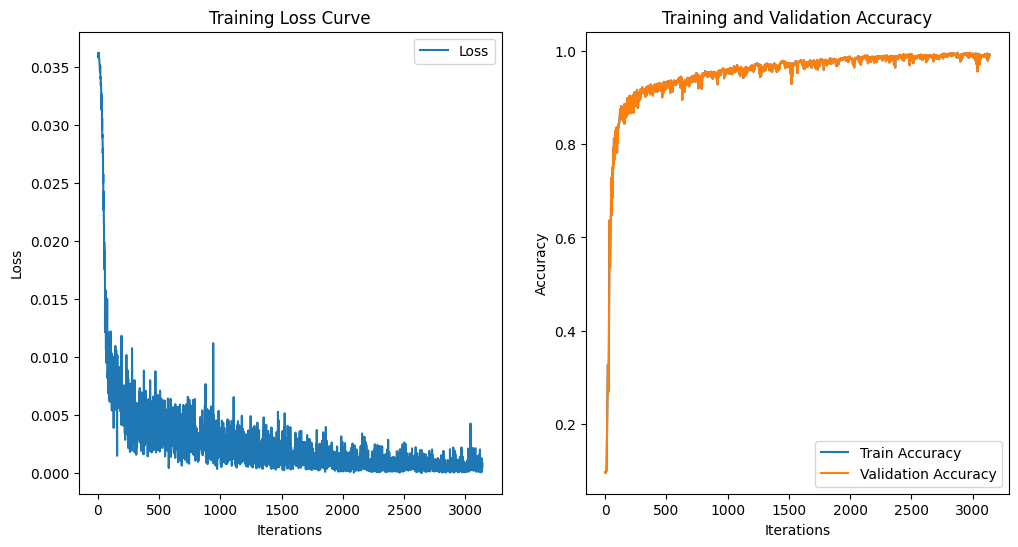

In [13]:
train(cnn_model, train_loader, num_epochs= 20)

This code tests the trained model's accuracy on the training dataset by performing the following steps:

1. **Disable Gradient Calculation**:  
   The `torch.no_grad()` context is used to disable gradient tracking, which saves memory and computations during inference (testing).

2. **Iterating Through Data**:  
   The `DataLoader` iterates through the `train_dataset` in batches of 10. The `shuffle=True` ensures that the data is shuffled before feeding it into the model.

3. **Forward Pass**:  
   The model makes predictions for the current batch of input images with `cnn_model(inputs)`.

4. **Predictions**:  
   `_, predicted_labels = torch.max(outputs.data, 1)` selects the class with the highest output probability as the predicted label for each image.

5. **Accuracy Calculation**:  
   The `correct_predictions` variable counts how many predicted labels match the true labels, and `total_samples` keeps track of the total number of samples processed. The number of correct predictions is added up, and at the end, the accuracy is calculated as:

   Accuracy = (correct predictions / total samples) x times 100
   

6. **Print Accuracy**:  
   The final accuracy is printed as a percentage, showing how well the model performed on the test dataset.

In [14]:
# Test model
correct_predictions = 0
total_samples = 0
with torch.no_grad():
    for inputs, labels in torch.utils.data.DataLoader(train_dataset, batch_size=10, shuffle=True):
        outputs = cnn_model(inputs)

        _, predicted_labels = torch.max(outputs.data, 1)
        total_samples += labels.size(0)
        correct_predictions += (predicted_labels == labels).sum().item()

print(f"Accuracy of test set: {100 * correct_predictions / total_samples}")

Accuracy of test set: 99.07


This code snippet processes a batch of 10 images from the `train_dataset` and prints the predicted class labels for that batch. It first passes the input images through the trained `cnn_model` to generate predictions. Using `torch.max`, it extracts the predicted labels by selecting the class with the highest output probability for each image. The predicted labels are then printed for inspection. The loop is set to process only the first batch of data, as the `break` statement terminates the loop after printing the predictions for that batch. This is useful for quickly evaluating the model's performance on a small set of test data.

In [15]:
for inputs, labels in torch.utils.data.DataLoader(train_dataset, batch_size=10):
    out = cnn_model(inputs)
    _, predicted_labels = torch.max(out.data, 1)
    print(predicted_labels)
    break

tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])
